In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score

import os
from mpl_toolkits.basemap import Basemap

In [42]:
pred['topic'] = pred[['topic 0', 'topic 1', 'topic 2', 'topic 3', 'topic 4', 'topic 5']].apply(lambda x: x.argmax(), axis = 1)

C:\Users\pengj\Anaconda2\envs\threesix\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


In [46]:
pred[pred['topic'] == 'topic 0']

,15_day_hold?,application_number,assessor_stories,avs_street_name,avs_street_sfx,block,city,company_name,contact_name,contact_phone,...,location,has_existing_stories,prediction,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic
325,NaN,2.00311e+11,NaN,47TH,AV,1802,NaN,NaN,NaN,NaN,...,"(-122.50709, 37.76143)",0,0.030883,0.028448,0.015336,0.000000,0.000701,0.000000,0.000000,topic 0
333,NaN,2.00404e+11,NaN,MARIETTA,DR,2954A,NaN,NaN,JERRY BROWN DESIGN,NaN,...,"(-122.44662, 37.74022)",0,0.026110,0.019829,0.006831,0.000000,0.001117,0.007546,0.004648,topic 0
334,NaN,2.00404e+11,NaN,OCEAN,AV,6936,NaN,NaN,NaN,NaN,...,"(-122.458305, 37.7243)",0,0.087908,0.011497,0.006241,0.000000,0.005312,0.000000,0.000766,topic 0
335,NaN,2.00404e+11,NaN,OCEAN,AV,6936,NaN,NaN,NaN,NaN,...,"(-122.45832, 37.724304)",0,0.087908,0.011497,0.006241,0.000000,0.005312,0.000000,0.000766,topic 0
342,NaN,2.00404e+11,NaN,26TH,ST,6556,SAN FRANCISCO,MULLINS PTG & GEN CONST,NaN,NaN,...,"(-122.4367, 37.747936)",0,0.068088,0.010942,0.006305,0.000000,0.001265,0.000000,0.003313,topic 0
346,NaN,2.00404e+11,NaN,JERSEY,ST,6538,SAN FRANCISCO,OKELL'S FIREPLACES,NaN,NaN,...,"(-122.433525, 37.75051)",0,0.052571,0.008642,0.005208,0.000000,0.000045,0.001093,0.001452,topic 0
347,NaN,2.00404e+11,NaN,FAIR,AV,5615,NaN,NaN,NaN,NaN,...,"(-122.41905, 37.745243)",0,0.021970,0.015506,0.008679,0.000000,0.000000,0.000000,0.000000,topic 0
349,NaN,2.00404e+11,NaN,47TH,AV,2378,BURLINGAME,OCEANA CONSTRUCTION,NaN,NaN,...,"(-122.505646, 37.74087)",0,0.062223,0.061447,0.000000,0.004659,0.000707,0.000000,0.000000,topic 0
351,NaN,2.00304e+11,NaN,46TH,AV,2447,NaN,NaN,NaN,NaN,...,"(-122.50442, 37.73862)",0,0.011968,0.029840,0.011752,0.000000,0.000111,0.004240,0.001018,topic 0
354,NaN,2.00312e+11,NaN,VALENCIA,ST,3555,NaN,NaN,"SIKAROVOL & ASSOC 1724 MANELA PKWY,STE 3 OAKLAND",NaN,...,"(-122.42206, 37.7665)",0,0.027906,0.016064,0.003142,0.003299,0.000026,0.000000,0.006987,topic 0


In [2]:
with open('models/model.p', 'rb') as file:
    model_up = pickle.load(file)
with open('data/locations.p', 'rb') as file:
    locations = pickle.load(file)
with open('models/vec.p', 'rb') as file:
    vec = pickle.load(file)
with open('archive/predictor.p', 'rb') as file:
    pred = pickle.load(file)
with open('archive/text.p', 'rb') as file:
    text = pickle.load(file)

C:\Users\pengj\Anaconda2\envs\threesix\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\pengj\Anaconda2\envs\threesix\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\pengj\Anaconda2\envs\threesix\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\pengj\Anaconda2\envs\threesix\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.2 when

In [19]:
with open('data/fires.p', 'rb') as file:
    fires = pickle.load(file)
with open('train/test_mask.p', 'rb') as file:
    test_mask = pickle.load(file)

In [38]:
pred['location'] = pred['address'].apply(lambda x: locations[x])

In [39]:
train_mask = (pred['status_date'] - pd.to_datetime('2003-01-01')).apply(lambda x: x.days) <= 5478

In [40]:
train_mask = train_mask.values

In [41]:
pred['has_existing_stories'] = (~pred['existing_stories'].isnull()).astype(int)
pred['existing_stories'] = pred['existing_stories'].fillna(0)

In [42]:
X_text = vec.transform(text)

In [98]:
pred['prediction'] = model_up.predict_proba(pred, X_text)

In [ ]:
pred

In [20]:
y = (fires[:,1] > 0).astype(int)

In [9]:
x_axis, y_axis = np.array([x for x,y in pred.location]), np.array([y for x,y in pred.location])

In [101]:
sample_idx = np.random.choice(test_mask.sum(), 1000, replace = False)

In [11]:
mask = test_mask

In [53]:
temp_mask = (pred['status_date'].apply(lambda x: x.year) < 2015).values

In [79]:
mask = (pred['status_date'].apply(lambda x: x.year) < 2016).values
mask = mask & ~temp_mask

In [17]:
pred['prediction'].iloc[sample_idx].shape

(1000,)

In [59]:
sample_idx = np.random.choice(mask.sum(), 600)

In [93]:
with open('data/predictor.p', 'wb') as file:
    pickle.dump(pred, file)

In [63]:
def coloring(number):
    if number > .6:
        return 'r'
    elif number > .3:
        return 'orange'
    else:
        return 'g'
f = np.vectorize(coloring)

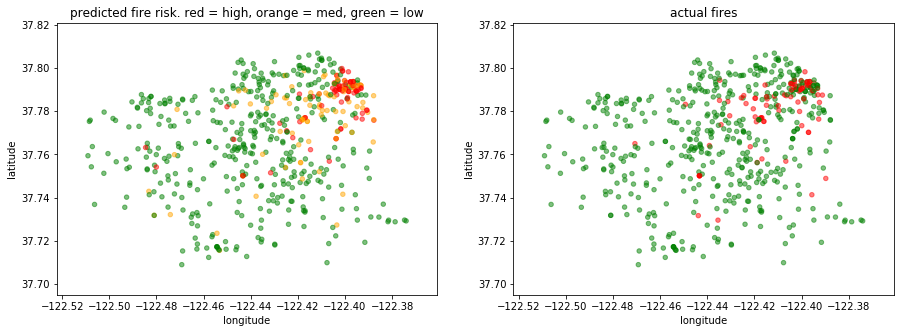

In [65]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
axs[0].set_title('predicted fire risk. red = high, orange = med, green = low')
axs[0].set_xlabel('longitude')
axs[0].set_ylabel('latitude')
axs[0].scatter(x_axis[mask][sample_idx], y_axis[mask][sample_idx], c = f(pred['prediction'][mask].iloc[sample_idx]), alpha = .5, s = 20)

axs[1].set_title('actual fires')
axs[1].set_xlabel('longitude')
axs[1].set_ylabel('latitude')
axs[1].scatter(x_axis[mask][sample_idx], y_axis[mask][sample_idx], c = f(y[mask][sample_idx]), alpha = .5, s = 20)

In [67]:
fig.savefig('results/pred_actual.png')

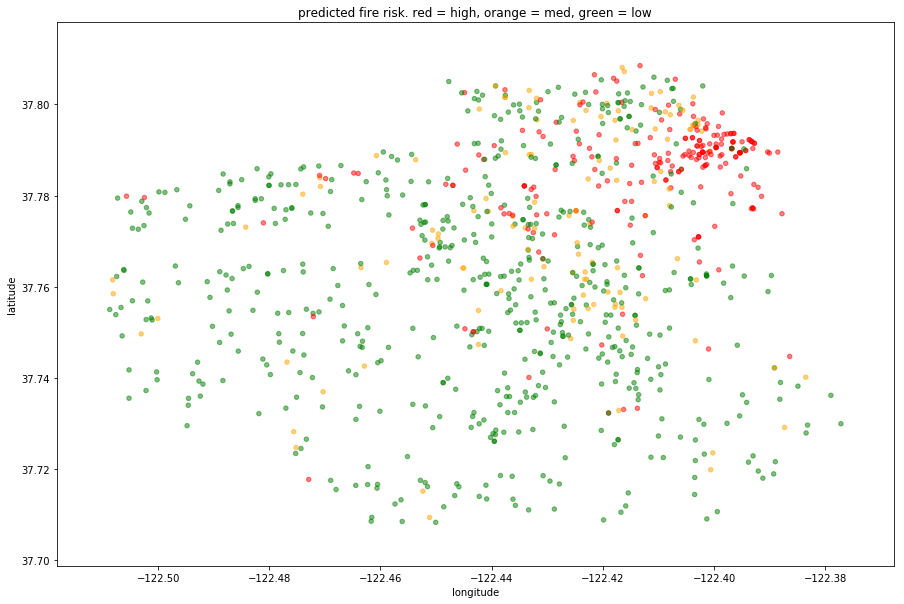

In [25]:
plt.figure(figsize = (15,10))
plt.title('predicted fire risk. red = high, orange = med, green = low')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(x_axis[mask][sample_idx], y_axis[mask][sample_idx], c = f(pred['prediction'][mask].iloc[sample_idx]), alpha = .5, s = 20)

In [33]:
model_up.threshold

0.358

In [85]:
np.vectorize(lambda x: bool(x))(x_axis)

array([ True,  True,  True, ...,  True,  True,  True])

In [91]:
ll_lon = (x_axis[np.vectorize(lambda x: bool(x))(x_axis)]).min()
ll_lat = (y_axis[np.vectorize(lambda x: bool(x))(x_axis)]).min()
ur_lon = (x_axis[np.vectorize(lambda x: bool(x))(x_axis)]).max()
ur_lat = (y_axis[np.vectorize(lambda x: bool(x))(x_axis)]).max()

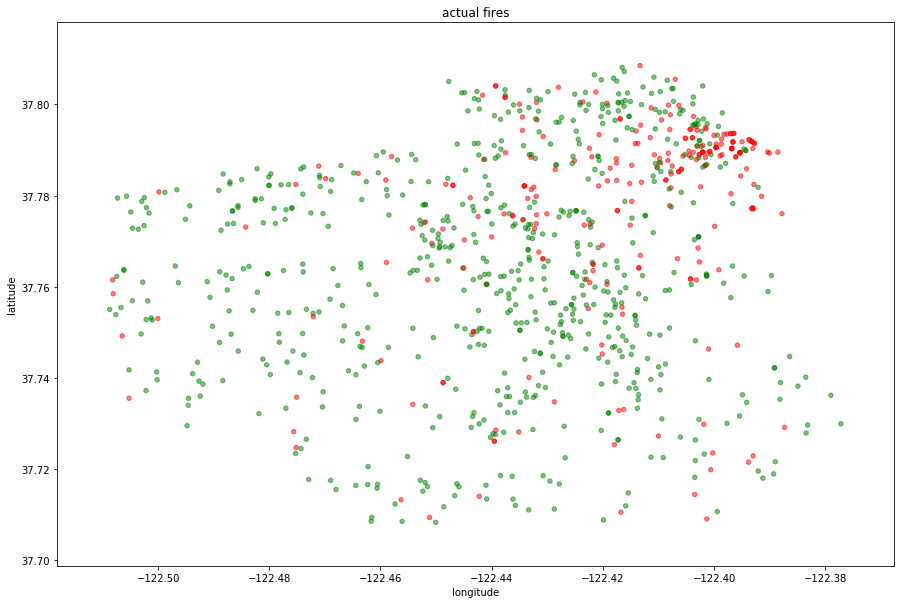

In [23]:
#m = Basemap(llcrnrlon = ll_lon, llcrnrlat = ll_lat, urcrnrlon = ur_lon, urcrnrlat = ur_lat, resolution = 'i')
#m.drawcoastlines()
plt.figure(figsize = (15,10))
plt.title('actual fires')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.scatter(x_axis[mask][sample_idx], y_axis[mask][sample_idx], c = f(y[mask].iloc[sample_idx]), alpha = .5, s = 20)

In [158]:
model_up.threshold

0.358

In [58]:
roc_auc_score(y[mask], np.full(mask.sum(), .12))

0.5

In [54]:
roc_auc_score(y[mask], pred['prediction'][mask])

0.7960031335477964

In [47]:
accuracy_score(y[mask], (pred['prediction'][mask]>.358).astype(int))

0.784056559414254

In [48]:
1 - y[mask].mean()

0.8795593470813461

In [52]:
map = Basemap()

In [108]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [113]:
DATASETS_URL = "https://github.com/ageron/handson-ml/raw/master/datasets"
import os
import tarfile
from six.moves import urllib

HOUSING_PATH = "datasets/housing"
HOUSING_URL = DATASETS_URL + "/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.exists(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [114]:
import pandas as pd
coords = pd.concat([housing['latitude'], housing['longitude'], housing['population']], axis=1)
coords = coords.sample(frac=0.1, replace=True)
cases = []
colors = ['rgb(239,243,255)','rgb(189,215,231)','rgb(107,174,214)','rgb(33,113,181)']
months = {6:'June',7:'July',8:'Aug',9:'Sept'}

for i in range(6,10)[::-1]:
    cases.append(go.Scattergeo(
        lon = coords['longitude'],
        lat = coords['latitude'],
        marker = dict(
            size = coords['population']/1000,
            color = 'colors[i-6]',
            opacity = .4,
            line = dict(width = 0)
        ),
    ) )

cases[0]['mode'] = 'markers'

layout = go.Layout(
    title = 'Hey look! It\'s a scatter plot on a map!',
    geo = dict(
        resolution = 100,
        scope = 'usa',
        showframe = False,
        showcoastlines = True,
        showland = True,
        landcolor = "rgb(229, 229, 229)",
        countrycolor = "rgb(255, 255, 255)" ,
        coastlinecolor = "rgb(255, 255, 255)",
        projection = dict(
            type = 'Mercator'
        ),
        lonaxis = dict( range= [ -124.0, -113.0 ] ),
        lataxis = dict( range= [ 32.0, 43.0 ] ),
        
    ),
    legend = dict(
           traceorder = 'reversed'
    )
)


fig = go.Figure(layout=layout, data=cases)
plotly.offline.iplot(fig, validate=False, filename='iantest')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of scattergeo.marker
        Received value: 'colors[i-6]'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, saddlebrown, salmon, sandybrown,
            seagreen, seashell, sienna, silver, skyblue,
            slateblue, slategray, slategrey, snow, springgreen,
            steelblue, tan, teal, thistle, tomato, turquoise,
            violet, wheat, white, whitesmoke, yellow,
            yellowgreen
      - A number that will be interpreted as a color
        according to scattergeo.marker.colorscale
      - A list or array of any of the above